In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv("StudentsPerformance.csv")

In [213]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [214]:
#cleaning the data from the missing value and drop column 
def clean(data):
    data = data.drop(["race/ethnicity"] , axis=1)
    cols = ["math score" , "reading score" , "writing score"]
    for col in cols:
        data[col] = data[col].fillna(data[col].mean())
    return data
data = clean(data)

In [215]:
#Creating new columns for the average and performance
data['Average_Score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data['High_Performance'] = (data['Average_Score'] >= 80).astype(int)

In [216]:
#Droping the columns that we don't need it anymore
data.drop(['math score', 'reading score', 'writing score', 'Average_Score'], axis=1, inplace=True)

In [217]:
#Encoding
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [218]:
#Spilt the data
X = data.drop(["High_Performance"] , axis=1)
y = data["High_Performance"]

X_train, X_test, y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       169
           1       0.29      0.06      0.11        31

    accuracy                           0.83       200
   macro avg       0.57      0.52      0.51       200
weighted avg       0.76      0.83      0.78       200



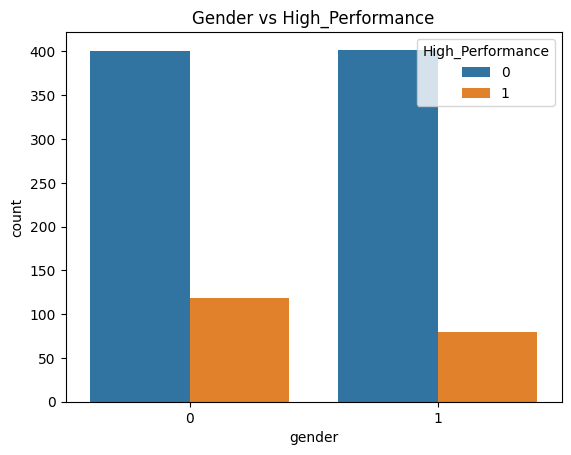

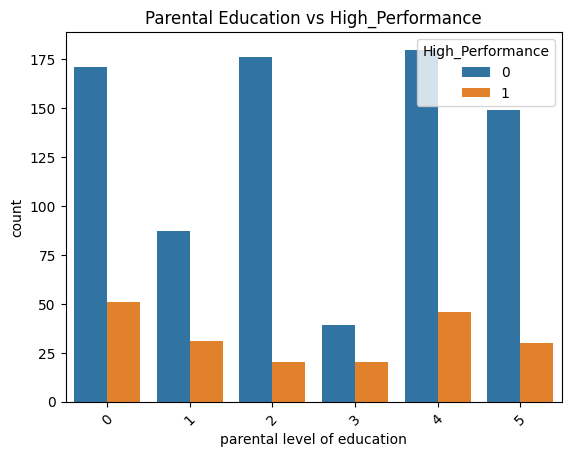

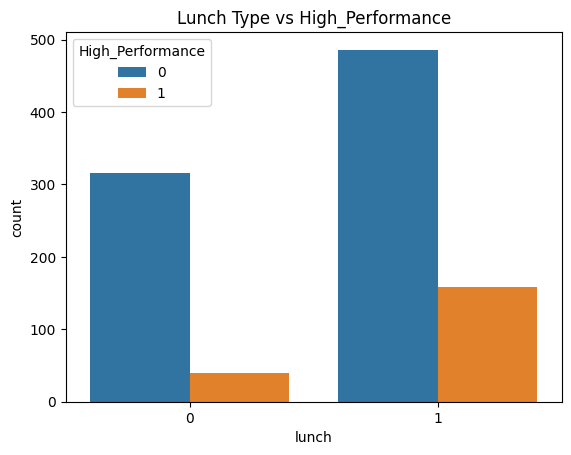

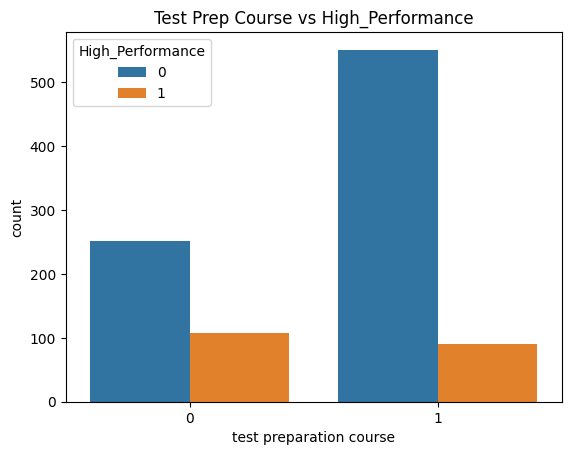

In [219]:
#Trainning the first model , RandomForstModel
ForstModel = RandomForestClassifier().fit(X_train,y_train)


#predicting 
y_pred = ForstModel.predict(X_test)


# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Gender vs High Performance
sns.countplot(data=data, x='gender', hue='High_Performance')
plt.title('Gender vs High_Performance')
plt.show()

# Parental Education Level
sns.countplot(data=data, x='parental level of education', hue='High_Performance')
plt.xticks(rotation=45)
plt.title('Parental Education vs High_Performance')
plt.show()

# Lunch Type
sns.countplot(data=data, x='lunch', hue='High_Performance')
plt.title('Lunch Type vs High_Performance')
plt.show()

# Test Preparation Course
sns.countplot(data=data, x='test preparation course', hue='High_Performance')
plt.title('Test Prep Course vs High_Performance')
plt.show()


C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



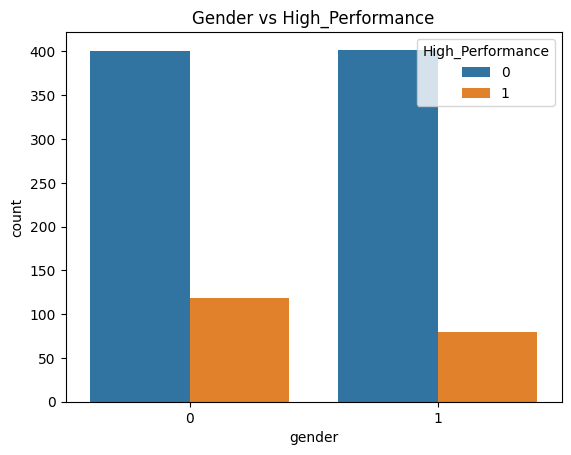

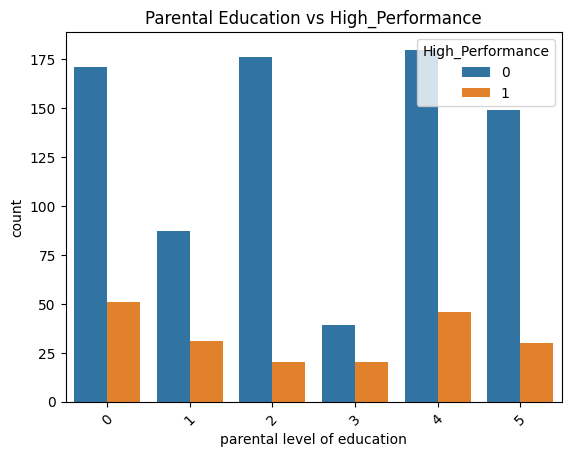

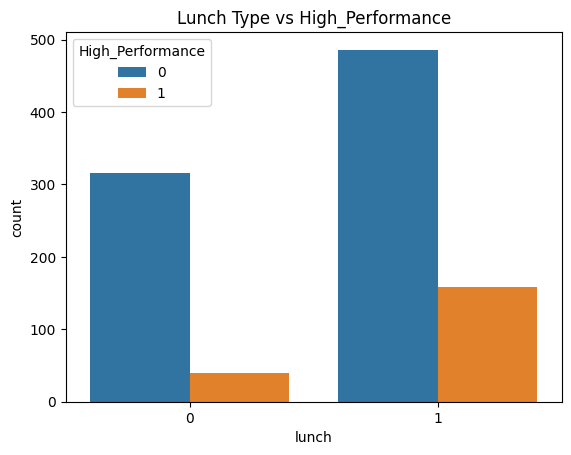

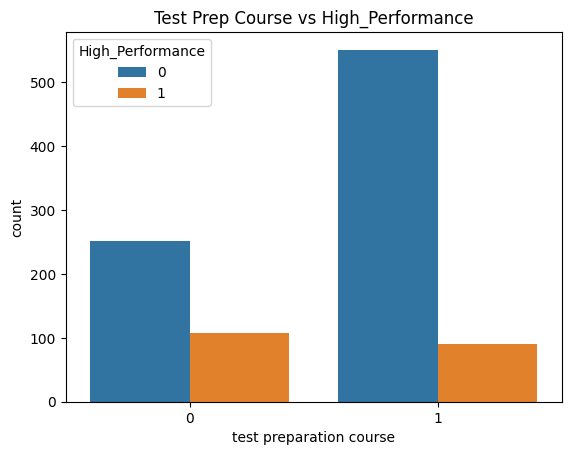

In [220]:
#Training the second model LogisticRegression

LogisticModel = LogisticRegression(max_iter=10000).fit(X_train, y_train)

#predicting 
y_predd = LogisticModel.predict(X_test)
# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_predd))


# Gender vs High Performance
sns.countplot(data=data, x='gender', hue='High_Performance')
plt.title('Gender vs High_Performance')
plt.show()

# Parental Education Level
sns.countplot(data=data, x='parental level of education', hue='High_Performance')
plt.xticks(rotation=45)
plt.title('Parental Education vs High_Performance')
plt.show()

# Lunch Type
sns.countplot(data=data, x='lunch', hue='High_Performance')
plt.title('Lunch Type vs High_Performance')
plt.show()

# Test Preparation Course
sns.countplot(data=data, x='test preparation course', hue='High_Performance')
plt.title('Test Prep Course vs High_Performance')
plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       169
           1       0.00      0.00      0.00        31

    accuracy                           0.82       200
   macro avg       0.42      0.49      0.45       200
weighted avg       0.71      0.82      0.76       200



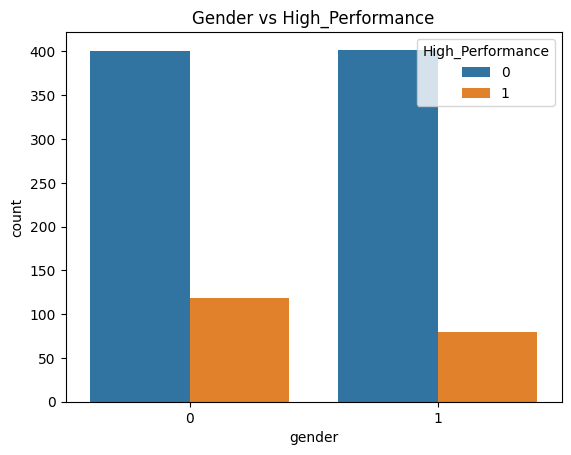

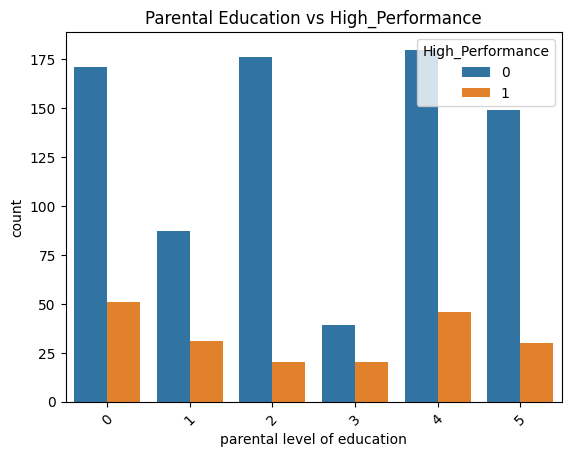

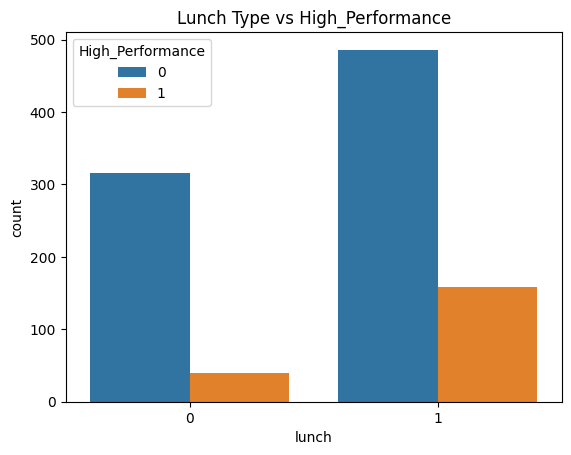

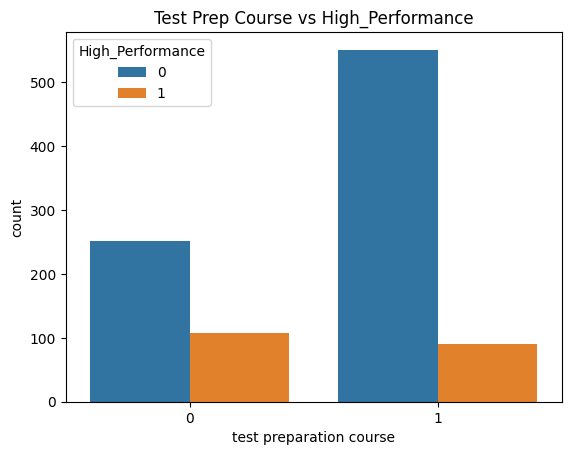

In [221]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


# Gender vs High Performance
sns.countplot(data=data, x='gender', hue='High_Performance')
plt.title('Gender vs High_Performance')
plt.show()

# Parental Education Level
sns.countplot(data=data, x='parental level of education', hue='High_Performance')
plt.xticks(rotation=45)
plt.title('Parental Education vs High_Performance')
plt.show()

# Lunch Type
sns.countplot(data=data, x='lunch', hue='High_Performance')
plt.title('Lunch Type vs High_Performance')
plt.show()

# Test Preparation Course
sns.countplot(data=data, x='test preparation course', hue='High_Performance')
plt.title('Test Prep Course vs High_Performance')
plt.show()